In [1]:
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

disasters_df = pd.read_csv("1900_2021_Disasters.csv")


In [2]:
disasters_df

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [3]:
disasters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        16126 non-null  int64  
 1   Seq                         16126 non-null  int64  
 2   Glide                       1581 non-null   object 
 3   Disaster Group              16126 non-null  object 
 4   Disaster Subgroup           16126 non-null  object 
 5   Disaster Type               16126 non-null  object 
 6   Disaster Subtype            13016 non-null  object 
 7   Disaster Subsubtype         1077 non-null   object 
 8   Event Name                  3861 non-null   object 
 9   Country                     16126 non-null  object 
 10  ISO                         16126 non-null  object 
 11  Region                      16126 non-null  object 
 12  Continent                   16126 non-null  object 
 13  Location                    143

In [10]:
# Eliminate 'Extra-Terrestrial' row. There is only 1 instance of this category. 

noextra = disasters_df[disasters_df['Disaster Subgroup'] !='Extra-terrestrial']

In [11]:
#confirm that 'Extra-terrestial' has been removed through further cleaning

disasters_unique = noextra['Disaster Subgroup'].unique()
disasters_unique

array(['Climatological', 'Geophysical', 'Meteorological', 'Hydrological',
       'Biological'], dtype=object)

In [12]:
noextra['Disaster Subgroup'].value_counts()

Hydrological      6327
Meteorological    5100
Geophysical       1857
Biological        1598
Climatological    1243
Name: Disaster Subgroup, dtype: int64

In [15]:
cleaned_data = noextra
cleaned_data

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16121,2021,449,FL-2021-000110,Natural,Hydrological,Flood,NaN,NaN,NaN,Yemen,...,67980.0,NaN,67980.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16122,2021,75,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,South Africa,...,400.0,NaN,400.0,NaN,75000.0,NaN,1;2,2707;77311;77312;77313;77315,77364;77367,"Free State, KwaZulu-Natal, Limpopo, Mpumalanga..."
16123,2021,599,EP-2021-000138,Natural,Biological,Epidemic,Viral disease,NaN,Meningitis,Congo (the Democratic Republic of the),...,NaN,NaN,301.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16124,2021,20,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,Serbia,...,22.0,NaN,22.0,NaN,NaN,NaN,1,25374;25378;25379;25380;25383;25386;25397,NaN,"Jablanicki, Kosovski, Kosovsko-mitrovatski, Ko..."


In [68]:
cleaned_data['Country'].value_counts()

United States of America (the)    1087
China                              980
India                              752
Philippines (the)                  668
Indonesia                          572
                                  ... 
Qatar                                1
Saint Barthélemy                     1
Saint Martin (French Part)           1
Sint Maarten (Dutch part)            1
Isle of Man                          1
Name: Country, Length: 228, dtype: int64

C:\Users\Erik Huerta\AppData\Local\Temp\ipykernel_6224\1216892480.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.int(label.get_text()) % 10 == 0:


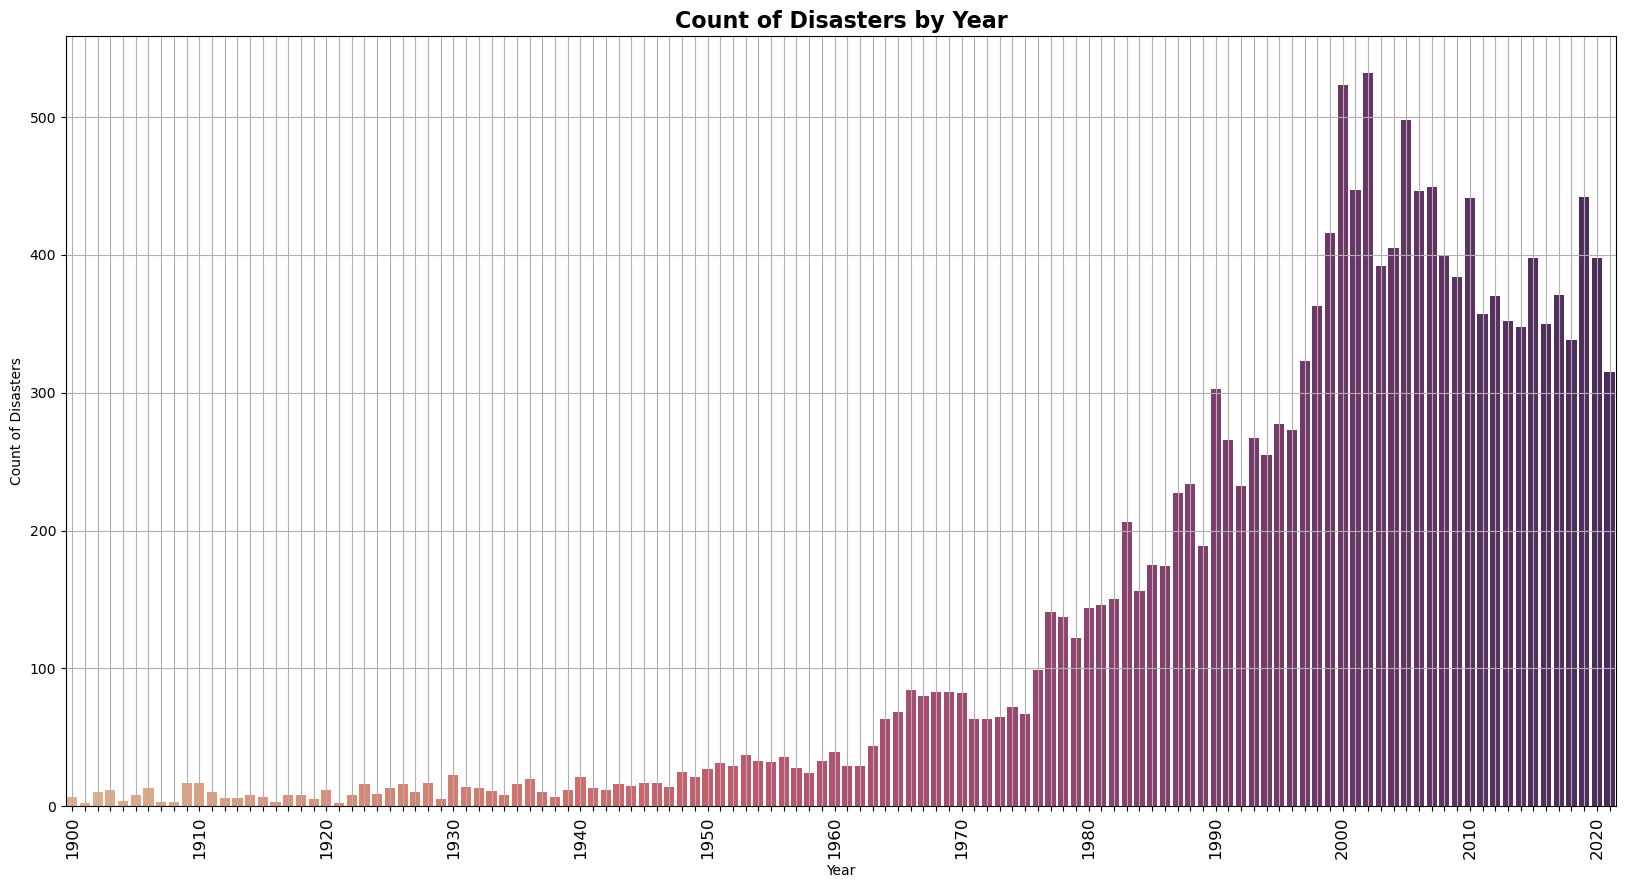

In [27]:
nd_years = cleaned_data.loc[:,['Year', 'Disaster Subgroup']]
                              
plt.figure(figsize=(20,10))
ax = sns.countplot(data = cleaned_data,x='Year', palette = 'flare')
plt.xticks(rotation=90,fontsize = 12)
ax.grid()


for label in ax.get_xticklabels():
    if np.int(label.get_text()) % 10 == 0:  
        label.set_visible(True)
    else:
        label.set_visible(False)

ax.set_xlabel('Year')
ax.set_ylabel('Count of Disasters')
plt.title('Count of Disasters by Year', fontsize = 16,weight = 'bold');   
                          
                              

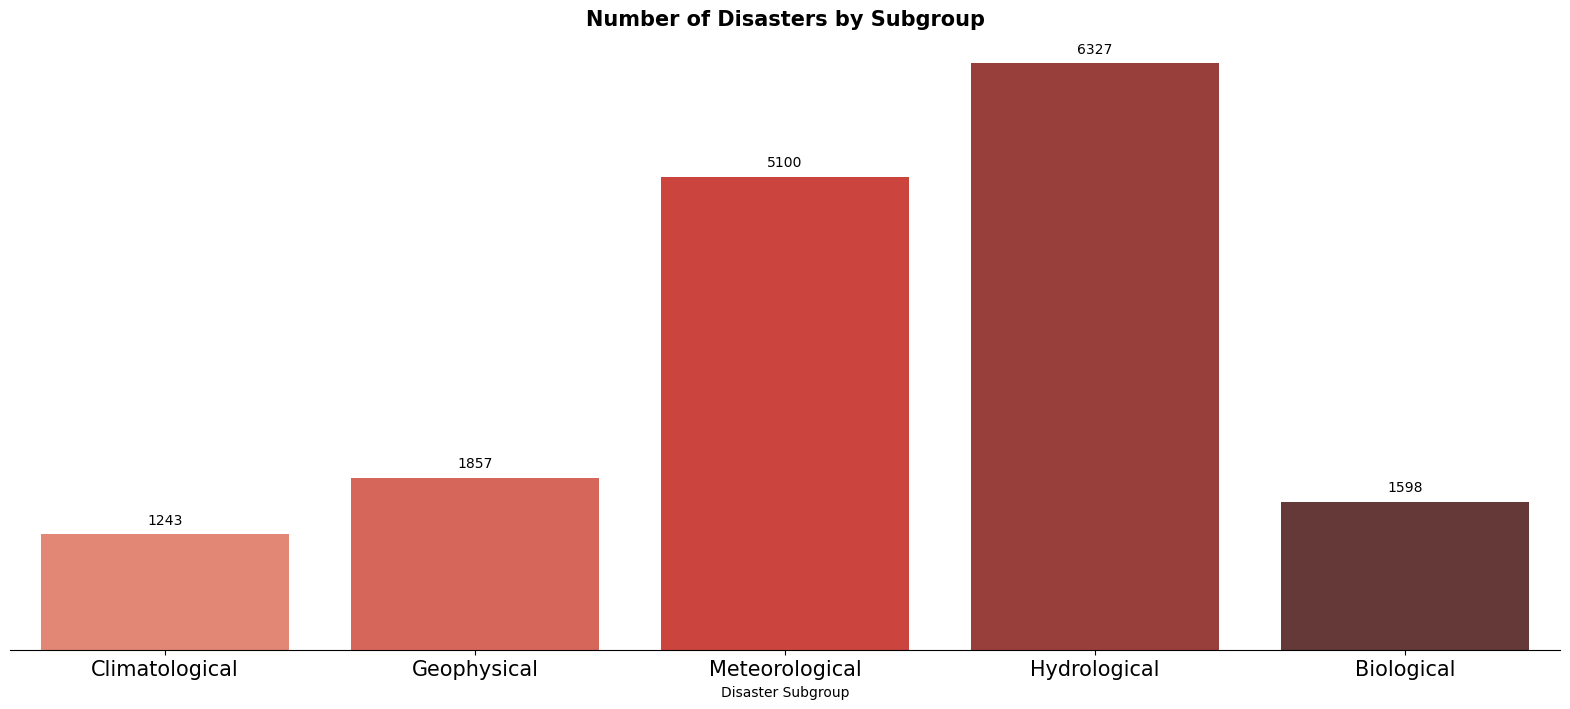

In [32]:
nd_nd = plt.figure(figsize=(20,8))
ax = sns.countplot(data = cleaned_data,x='Disaster Subgroup', palette = 'Reds_d')

for p in ax.patches:
        ax.annotate("%d" % p.get_height(), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(0, 5),rotation = 'horizontal',textcoords='offset points')

ax.set(yticklabels=[])
ax.axes.get_yaxis().set_visible(False)       
sns.despine(top=True, right=True, left=True, bottom=False)
plt.xticks(rotation=0,fontsize = 15)
ax.set_xlabel('Disaster Subgroup')
ax.set_ylabel('Number of Disasters')
plt.title('Number of Disasters by Subgroup', fontsize = 15,weight = 'bold'); 

### How does Mexico compare to the rest of the world in relation to Natural Disasters?

In [ ]:
# Do a .descripe by country with av. of how many natural disasters Mexico has in comparison to the rest of the countries

In [51]:
bycountry_data = cleaned_data[['Year', 'Disaster Subgroup', 'Country' ]]
bycountry_data

,Year,Disaster Subgroup,Country
0,1900,Climatological,Cabo Verde
1,1900,Climatological,India
2,1902,Geophysical,Guatemala
3,1902,Geophysical,Guatemala
4,1902,Geophysical,Guatemala
...,...,...,...
16121,2021,Hydrological,Yemen
16122,2021,Hydrological,South Africa
16123,2021,Biological,Congo (the Democratic Republic of the)
16124,2021,Hydrological,Serbia


In [91]:
all_cou = bycountry_data.describe()
all_cou

,Year
count,16125.000000
mean,1996.763783
std,20.159285
min,1900.000000
25%,1989.000000
50%,2001.000000
75%,2011.000000
max,2021.000000


In [53]:
# Exclude Mexico from 'Country' column

nonmx_data = bycountry_data[bycountry_data['Country'] !='Mexico']
nonmx_data

,Year,Disaster Subgroup,Country
0,1900,Climatological,Cabo Verde
1,1900,Climatological,India
2,1902,Geophysical,Guatemala
3,1902,Geophysical,Guatemala
4,1902,Geophysical,Guatemala
...,...,...,...
16121,2021,Hydrological,Yemen
16122,2021,Hydrological,South Africa
16123,2021,Biological,Congo (the Democratic Republic of the)
16124,2021,Hydrological,Serbia


In [88]:
nonmex_count = nonmx_data['Disaster Subgroup'].describe()
nonmex_count


count            15832
unique               5
top       Hydrological
freq              6238
Name: Disaster Subgroup, dtype: object

In [87]:
nonmx_counts = nonmx_data.groupby('Year')['Disaster Subgroup'].value_counts()
nonmx_counts

Year  Disaster Subgroup
1900  Climatological         2
      Geophysical            2
      Biological             1
      Hydrological           1
      Meteorological         1
                          ... 
2021  Hydrological         167
      Meteorological        79
      Climatological        28
      Geophysical           27
      Biological             5
Name: Disaster Subgroup, Length: 507, dtype: int64

In [61]:
# to count how many Disaster in all (excluding Mexico)
nonmx_counts.sum()

15832

In [71]:
# Average number of Disaster per Year (excluding Mexico)

nonmx_avg = nonmx_counts.mean()
nonmx_avg

31.22682445759369

In [75]:
# I only want to see Mexico under 'Country'. In a DataFrame.

mx_data = bycountry_data[bycountry_data['Country'].str.contains('Mexico')]
mx_data

,Year,Disaster Subgroup,Country
946,1929,Climatological,Mexico
1021,1943,Geophysical,Mexico
1067,1949,Geophysical,Mexico
1092,1951,Meteorological,Mexico
1108,1952,Hydrological,Mexico
...,...,...,...
15803,2021,Meteorological,Mexico
15918,2021,Meteorological,Mexico
15919,2021,Hydrological,Mexico
15920,2021,Hydrological,Mexico


In [84]:
count_mx = mx_data['Disaster Subgroup'].describe()
count_mx

count                293
unique                 5
top       Meteorological
freq                 137
Name: Disaster Subgroup, dtype: object

In [78]:
mx_counts = mx_data.value_counts()
mx_counts

Year  Disaster Subgroup  Country
2021  Meteorological     Mexico     6
1995  Meteorological     Mexico     6
2011  Meteorological     Mexico     6
2014  Meteorological     Mexico     6
2020  Meteorological     Mexico     5
                                   ..
1996  Hydrological       Mexico     1
      Climatological     Mexico     1
1978  Climatological     Mexico     1
1920  Geophysical        Mexico     1
1911  Geophysical        Mexico     1
Length: 144, dtype: int64

In [79]:
mx_avg = mx_counts.mean()
mx_avg

2.0347222222222223

In [ ]:
# Compare MX to All others

mx_all_counts = mx_counts('Year')[]